# Walmart Sales Data Analysis

## Objective
Analyze Walmart sales data to identify trends, seasonality, and factors affecting sales.
The cleaned dataset will be used to build an interactive Power BI dashboard for business insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Holiday_Type'] = df['Holiday_Flag'].map({
    0: 'Non-Holiday',
    1: 'Holiday'
})

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Week'] = df['Date'].dt.isocalendar().week

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type,Year,Month,Month_Name,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Non-Holiday,2010,2,February,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Holiday,2010,2,February,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Non-Holiday,2010,2,February,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Non-Holiday,2010,2,February,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Non-Holiday,2010,3,March,9


In [11]:
weekly_trend = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

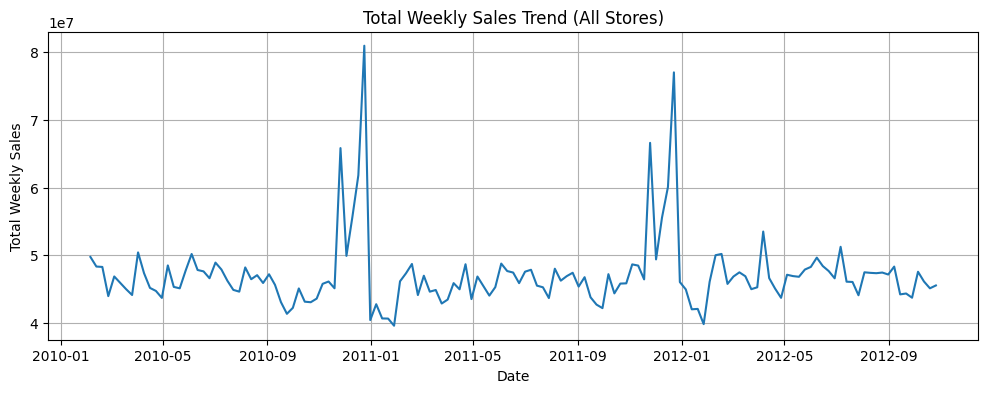

In [12]:
plt.figure(figsize=(12,4))
plt.plot(weekly_trend['Date'], weekly_trend['Weekly_Sales'])
plt.title("Total Weekly Sales Trend (All Stores)")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.show()

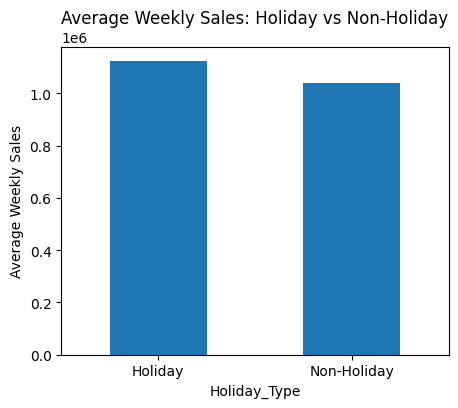

In [13]:
# Holiday vs Non-Holiday Sales
holiday_avg = df.groupby('Holiday_Type')['Weekly_Sales'].mean()

holiday_avg.plot(
    kind='bar',
    figsize=(5,4),
    title='Average Weekly Sales: Holiday vs Non-Holiday'
)
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=0)
plt.show()

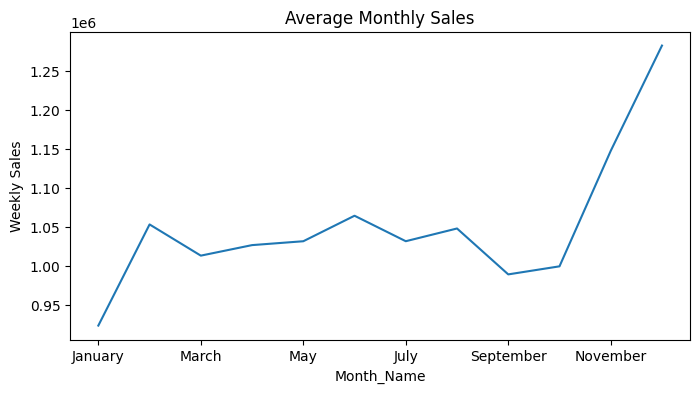

In [14]:
# Monthly Seasonality
monthly_sales = df.groupby('Month_Name')['Weekly_Sales'].mean()
monthly_sales = monthly_sales.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

monthly_sales.plot(figsize=(8,4), title="Average Monthly Sales")
plt.ylabel("Weekly Sales")
plt.show()

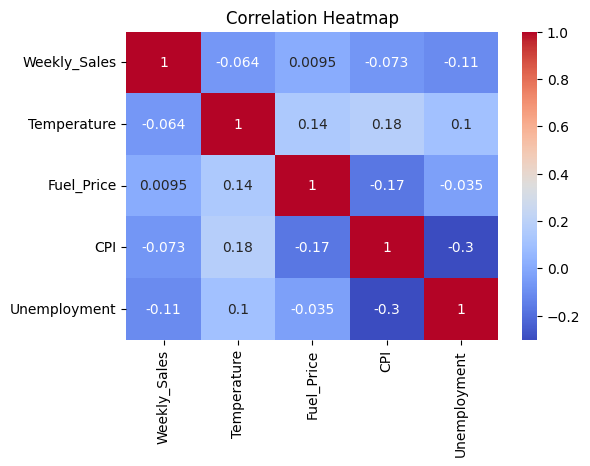

In [15]:
# Correlation with Weekly Sales
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Store Performance(Top Stores)
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

store_sales.head(10)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

In [17]:
df.to_csv("Walmart_Sales_PowerBI_Ready.csv", index=False)